<a href="https://colab.research.google.com/github/GLopezMUZH/ABM_NurseSchedullingModel/blob/master/yolo4BeeTrack_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO4 BEE TRACK - TESTING THE MODEL
Follow Steps
1. Mount the google drive
2. Settings
3. 

## 1. Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# the project's folder
# %cd '/gdrive/My Drive/Colab Notebooks/beeWatch'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 2. Settings
* tree
* cuDNN according to CUDA version


In [ ]:
import time
import os
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (1,138 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure

In [ ]:
#!tree /content/gdrive/My\ Drive/darknet/

Install cuDNN according to the current CUDA version

a - Download cuDNN from [Nvidia website](https://developer.nvidia.com/cudnn) 

b- On local computer, create a folder named _**cuDNN**_ in local folder _**darknet**_. Copy the _**tgz**_ file there 

Check that it matches ( **CUDA 10.0** needs [cuDNN v7.5.0.56 for CUDA v10.0](https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v7.5.0.56/prod/10.0_20190219/cudnn-10.0-linux-x64-v7.5.0.56.tgz) - the file is cudnn-10.0-linux-x64-v7.5.0.56.tgz )

In [ ]:
# CUDA: check which version of Nvidia CUDA is already installed
# !/usr/local/cuda/bin/nvcc --version


In [ ]:
# Unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf /content/gdrive/My\ Drive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


Copy the compiled version of Darknet from Drive to the VM.
* Make the local darknet folder
* Copy the darknet file
* Set execution permissions

In [ ]:
!ls -la
#!mv *.* ./darknet/darknet/ ./darknet

total 24
drwxr-xr-x  1 root root 4096 Jun 23 12:46 .
drwxr-xr-x  1 root root 4096 Jun 23 12:39 ..
drwxr-xr-x  1 root root 4096 Jun 19 16:15 .config
drwx------ 17 root root 4096 Jun 23 13:02 darknet
drwx------  4 root root 4096 Jun 23 12:44 gdrive
drwxr-xr-x  1 root root 4096 Jun 17 16:18 sample_data


In [ ]:
# Copy the Darkent compiled version to the VM local drive
!cp -r /content/gdrive/My\ Drive/darknet/bin4/darknet/darknet ./ #darknet

In [ ]:
%cd darknet/
print(os.getcwd())
!chmod +x ./darknet
!ls -la

/content/darknet
/content/darknet
total 423524
drwx------ 17 root root      4096 Jun 23 13:02 .
drwxr-xr-x  1 root root      4096 Jun 23 12:46 ..
drwx------  4 root root      4096 Jun 23 12:47 3rdparty
drwx------  2 root root      4096 Jun 23 13:01 backup
drwx------  3 root root      4096 Jun 23 12:47 build
-rw-------  1 root root      8285 Jun 23 12:47 build.ps1
-rw-------  1 root root      2044 Jun 23 12:47 build.sh
drwx------  3 root root      4096 Jun 23 12:54 cfg
drwx------  2 root root      4096 Jun 23 12:47 .circleci
drwx------  3 root root      4096 Jun 23 12:55 cmake
-rw-------  1 root root     20573 Jun 23 12:47 CMakeLists.txt
-rwx--x--x  1 root root   5481936 Jun 23 12:54 darknet
-rw-------  1 root root      1363 Jun 23 12:47 DarknetConfig.cmake.in
-rw-------  1 root root     20056 Jun 23 12:54 darknet.py
-rw-------  1 root root      4010 Jun 23 12:54 darknet_video.py
drwx------  3 root root      4096 Jun 23 12:55 data
drwx------  8 root root      4096 Jun 23 12:47 .git
drwx

Some Utils

* imgShow() - Will help us to show an image in the remote VM
* download() - Will allow you to get some file from your notebook in case you need to
* upload() - You can upload files to your current folder on the remote VM.

[Ivan Goncharov](https://twitter.com/Ivangrov)

In [ ]:
#download files
def imShow(path):
  import cv2
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

## TODO UPDATE 4 yolo4 Runtime configuration finished
Validate



In [ ]:
%cd ../


# Test Images

In [ ]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov4_bees.cfg" "/content/gdrive/My Drive/darknet/backup_yolo4/yolov4_bees_best.weights" "/content/gdrive/My Drive/darknet/test/united_queens_20190930-130100-1569841260_frame_4840.jpg"
#/content/gdrive/My Drive/darknet/test/BeeWatch8304-20191003-133207-1570102327_short_frame_1.jpg
#./img/BeeWatch8304-20190727-153421-1564234461_29082.png
#!./darknet detect "cfg/yolov3.cfg" "yolov3.weights" "data/person.jpg" -dont-show
imShow('predictions.jpg')

/bin/bash: ./darknet: No such file or directory


AttributeError: ignored

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 ro

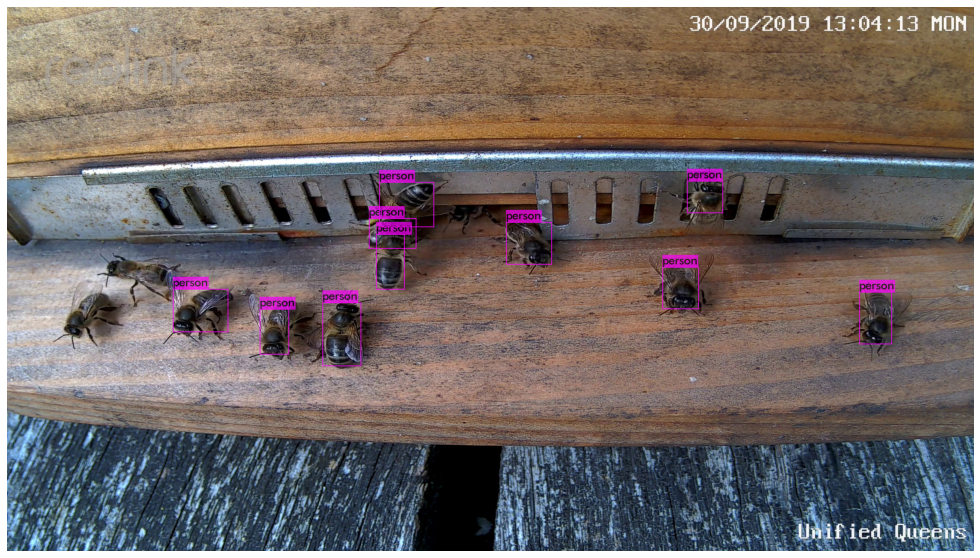

In [ ]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov4_bees_leaky.cfg" "/content/gdrive/My Drive/darknet/backup_yolo4/yolov4_bees_best.weights" "/content/gdrive/My Drive/darknet/test/united_queens_20190930-130100-1569841260_frame_4840.jpg"
#/content/gdrive/My Drive/darknet/test/BeeWatch8304-20191003-133207-1570102327_short_frame_1.jpg
#./img/BeeWatch8304-20190727-153421-1564234461_29082.png
#!./darknet detect "cfg/yolov3.cfg" "yolov3.weights" "data/person.jpg" -dont-show
imShow('predictions.jpg')

In [ ]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov4_bees.cfg" "/content/gdrive/My Drive/darknet/backup_yolo4/yolov4_bees_best.weights" ./img/0120190927131427_6048.png
imShow('predictions.jpg')

In [ ]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov4_bees.cfg" "/content/gdrive/My Drive/darknet/backup_yolo4/yolov4_bees_last.weights" /content/gdrive/My\ Drive/darknet/images_test/frame248.jpg
imShow('predictions.jpg')

## Test Video


In [ ]:
print(os.getcwd())
!ls

/content/darknet
3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet.py		LICENSE		       src
build.ps1	darknet_video.py	Makefile	       video_v2.sh
build.sh	data			net_cam_v3.sh	       video_yolov3.sh
cfg		image_yolov2.sh		obj		       yolov4.conv.137
cmake		image_yolov3.sh		predictions.jpg        yolov4.weights
CMakeLists.txt	img			README.md


In [ ]:
!mkdir output
!ls ./output/

In [ ]:
#video easy command
# works but does not show video and does not save video output
!./darknet detector demo '/content/gdrive/My Drive/darknet/yolov4_bees.data' '/content/gdrive/My Drive/darknet/yolov4_bees.cfg' '/content/gdrive/My Drive/darknet/backup_yolo4/yolov4_bees_last.weights' '/content/gdrive/My Drive/darknet/vid/bees_2.mp4' -dont_show

In [ ]:
# works and saves video!
!./darknet detector demo '/content/gdrive/My Drive/darknet/yolov4_bees.data' '/content/gdrive/My Drive/darknet/yolov4_bees.cfg' '/content/gdrive/My Drive/darknet/backup_yolo4/yolov4_bees_last.weights' -dont_show '/content/gdrive/My Drive/darknet/vid/mucho_bess_2.mp4' -i 0 -out_filename res.avi

In [ ]:
# works and saves video!
#bees_2.ipynb.mp4
!./darknet detector demo '/content/gdrive/My Drive/darknet/yolov4_bees.data' '/content/gdrive/My Drive/darknet/yolov4_bees.cfg' '/content/gdrive/My Drive/darknet/backup_yolo4/yolov4_bees_last.weights' -dont_show '/content/gdrive/My Drive/darknet/vid/IMG_6422.MOV' -i 0 -out_filename res.avi

In [ ]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 Jun 17 16:18 .
drwxr-xr-x 1 root root 4096 Jun 19 11:15 ..
drwxr-xr-x 1 root root 4096 Jun 17 16:18 .config
drwxr-xr-x 1 root root 4096 Jun 17 16:18 sample_data


In [ ]:
!du -h res.avi

In [ ]:
from google.colab import files

files.download('/content/darknet/darknet/res.avi')

In [ ]:
!rm -r res.avi

### Get bounding boxes information YOLO4 NOT TESTED !!

In [ ]:
print(cv2.__version__)

NameError: ignored

In [ ]:
#install opencv Version 4.2
#!pip3 install imgaug
#import imgaug
print(imgaug.__version__)


NameError: ignored

In [ ]:
!pip uninstall opencv-python

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
#import cv2


In [ ]:
time.asctime()
print(cv2.__version__)

In [ ]:
# import the necessary packages
import numpy as np
import imutils
import time
import cv2
import os

# arguments
args_confidence = 0.5
args_threshold = 0.3
weightsPath = '/content/gdrive/My Drive/darknet/backup_yolo4/yolov4_bees_best.weights'
configPath = '/content/gdrive/My Drive/darknet/yolov4_bees.cf'
videoPath = '/content/gdrive/My Drive/darknet/vid/bess_2.mp4'
outputPath = './output' #'/content/gdrive/My Drive/darknet/output/'

# load the class labels our YOLO model was trained on
labelsPath = '/content/gdrive/My Drive/darknet/bee.names'  
LABELS = open(labelsPath).read().strip().split("\n")
# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
# derive the paths to the YOLO weights and model configuration

#'/content/gdrive/My Drive/darknet/obj.data'  

# load our YOLO object detector trained on your dataset 
# and determine only the *output* layer names that we need from YOLO
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(videoPath)
writer = None
(W, H) = (None, None)
# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
		else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))
# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

# initialize our lists of detected bounding boxes, confidences,
# and class IDs, respectively
boxes = []
confidences = []
class_ids = []
framesCaptured = 0
boxes_to_frames = []

# loop over frames from the video file stream
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()
	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break
	# if the frame dimensions are empty, grab them
	if W is None or H is None:
		(H, W) = frame.shape[:2]
	
	# ggg 
	framesCaptured += 1
	
	# construct a blob from the input frame and then perform a forward
	# pass of the YOLO object detector, giving us our bounding boxes
	# and associated probabilities
	blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (608, 608), swapRB=True, crop=False)
	net.setInput(blob)
	start = time.time()
	layerOutputs = net.forward(ln)
	end = time.time()
	# loop over each of the layer outputs
	for output in layerOutputs:
		# loop over each of the detections
		for detection in output:
			# extract the class ID and confidence (i.e., probability)
			# of the current object detection
			scores = detection[5:]
			classID = np.argmax(scores)
			confidence = scores[classID]
			# filter out weak predictions by ensuring the detected
			# probability is greater than the minimum probability
			if confidence > args_confidence:
				# scale the bounding box coordinates back relative to
				# the size of the image, keeping in mind that YOLO
				# actually returns the center (x, y)-coordinates of
				# the bounding box followed by the boxes' width and
				# height
				box = detection[0:4] * np.array([W, H, W, H])
				(centerX, centerY, width, height) = box.astype("int")
				# use the center (x, y)-coordinates to derive the top
				# and and left corner of the bounding box
				x = int(centerX - (width / 2))
				y = int(centerY - (height / 2))
				# update our list of bounding box coordinates,
				# confidences, and class IDs
				boxes.append([x, y, int(width), int(height)])
				confidences.append(float(confidence))
				class_ids.append(classID)
				boxes_to_frames.append([framesCaptured,x, y, int(width), int(height),confidence])
	# apply non-maxima suppression to suppress weak, overlapping bounding boxes
	#idxs = cv2.dnn.NMSBoxes(boxes, confidences, args_confidence, args_threshold)
	# ggg log everything
	idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)

	# ensure at least one detection exists
	if len(idxs) > 0:
		# loop over the indexes we are keeping
		for i in idxs.flatten():
			# extract the bounding box coordinates
			(x, y) = (boxes[i][0], boxes[i][1])
			(w, h) = (boxes[i][2], boxes[i][3])
			# draw a bounding box rectangle and label on the frame
			color = [int(c) for c in COLORS[class_ids[i]]]
			cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
			text = "{}: {:.4f}".format(LABELS[class_ids[i]],
				confidences[i])
			cv2.putText(frame, text, (x, y - 5),
				cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	# check if the video writer is None
	if writer is None:
		# initialize our video writer
		#fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		#writer = cv2.VideoWriter(outputPath, fourcc, 30,
		#	(frame.shape[1], frame.shape[0]), True)
	
		#ggg 
		#writer = cv2.VideoWriter('output.avi', -1, 20.0, (640,480))
		writer = cv2.VideoWriter('output.avi', -1, 25.0, (frame.shape[1], frame.shape[0]))

		# some information on processing single frame
		if total > 0:
			elap = (end - start)
			print("[INFO] single frame took {:.4f} seconds".format(elap))
			print("[INFO] estimated total time to finish: {:.4f}".format(
				elap * total))
	# write the output frame to disk
	writer.write(frame)
# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()

In [ ]:
#!ls
print(boxes_to_frames[1])
print(np.shape(boxes_to_frames))
# its a nested list
print(boxes_to_frames[1:5])
np.save("boxes_to_frames_download.npy", boxes_to_frames)
!ls


In [ ]:
np.savetxt('boxes_to_frames.csv', boxes_to_frames, delimiter=',') 

In [ ]:
from google.colab import files

files.download('/content/darknet/darknet/boxes_to_frames.csv')